<a href="https://colab.research.google.com/github/keithth/AI_Apps/blob/main/Haystack_Basics_with_Web_QA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Haystack

*Notebook by [Bilge Yucel](https://www.linkedin.com/in/bilge-yucel/) for Code & Deploy. Watch the recording [here](https://www.linkedin.com/events/code-deploy-buildyourfirstgenai7226658275792932864/comments/)*

* [📘 Documentation](https://docs.haystack.deepset.ai/docs)
* [🧑‍🏫 Tutorials](https://haystack.deepset.ai/tutorials)
* [🧑‍🍳 Cookbooks](https://github.com/deepset-ai/haystack-cookbook)

[Haystack](https://haystack.deepset.ai/) is an open source framework for building production-ready LLM applications:

* Semantic Search
* Retrieval Augmented Generation
* Conversational Systems
* ...

## Building Blocks 🧱

* Components & Pipelines
* Components: Embedders, Retrievers, Generators, Converters, Routers...
* Pipelines are Directed Graphs: loops, branches ✅

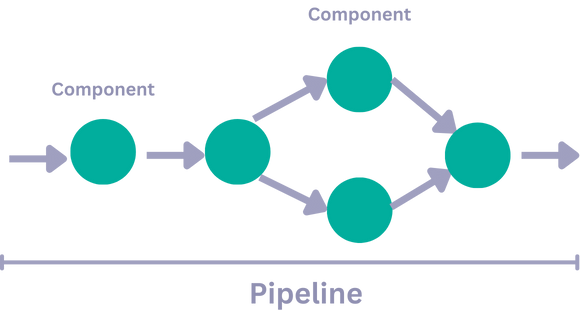



## Let's Build a Web QA System

* A system to ask questions to the given url content

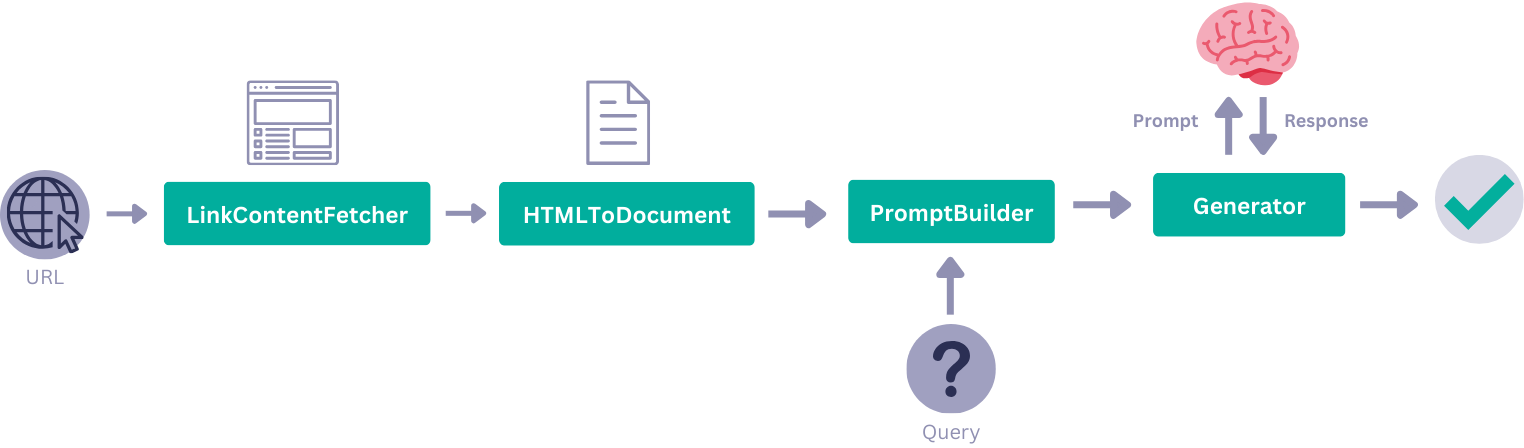

In [ ]:
!pip install haystack-ai trafilatura

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 350.7/350.7 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 131.8/131.8 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 837.8/837.8 kB 21.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 38.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 362.5/362.5 kB 18.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.8/41.8 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.9/318.9 kB 16.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 263.8/263.8 kB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58

In [ ]:
import os
from getpass import getpass

os.environ["HF_API_TOKEN"] = getpass('HF_API_TOKEN')

HF_API_TOKEN··········


In [ ]:
## Components & Pipelines
from haystack.components.fetchers import LinkContentFetcher

fetcher = LinkContentFetcher()
web_content =  fetcher.run(["https://haystack.deepset.ai/overview/quick-start"])


In [ ]:
web_content

{'streams': [ByteStream(data=b'<!DOCTYPE html>\n<html lang="en">\n  <head>\n  <meta charset="utf-8" />\n  <meta name="viewport" content="width=device-width,initial-scale=1" />\n\n  <title>\n    \n      Get Started | Haystack\n    \n  </title>\n\n  <meta name="description" content="Get started with Haystack pipelines. Build your first RAG application!" />\n\n  \n  \n\n\n\n  <meta property="og:title" content="Get Started | Haystack" />\n\n\n\n<meta\n  property="og:description"\n  content="\n    Get started with Haystack pipelines. Build your first RAG application!\n  "\n/>\n<meta\n  property="og:type"\n  content="\n    article\n  "\n/>\n<meta property="og:url" content="/overview/quick-start/" />\n<meta name="twitter:card" content="summary_large_image" />\n<meta name="twitter:creator" content="@haystack_ai" />\n<meta name="twitter:site" content="@haystack_ai" />\n\n\n  <meta name="twitter:title" content="Get Started | Haystack" />\n\n\n<meta\n  name="twitter:description"\n  content="\n   

In [ ]:
from haystack.components.converters import HTMLToDocument

converter = HTMLToDocument()
converter.run(sources=web_content["streams"])


{'documents': [Document(id=2469c3d5263b3be483363501e0cf22f8446ef4af9481a711a902e2092bd1fac2, content: 'Get Started
  Haystack is an open-source Python framework that helps developers build LLM-powered cust...', meta: {'content_type': 'text/html', 'url': 'https://haystack.deepset.ai/overview/quick-start'})]}

In [ ]:
from haystack.components.builders import PromptBuilder

prompt = """
Answer the question based on the given documents

Documents:
{%  for doc in docs %}
 {{doc.content}}
{% endfor %}

Question: {{question}}
"""

prompt_builder = PromptBuilder(prompt)

In [ ]:
from haystack.components.generators import HuggingFaceAPIGenerator

llm = HuggingFaceAPIGenerator(api_type="serverless_inference_api", api_params={"model": "mistralai/Mistral-7B-Instruct-v0.3"})

In [ ]:
llm.run("What is capital of Germany?")

{'replies': ["\n\nThe capital of Germany is Berlin. Berlin is the largest city by both area and population in Germany, and it is one of the 16 states of Germany. It is the center of the Berlin-Brandenburg Metropolitan Region, which is, with 6.6 million inhabitants and an area of more than 37,000 km², Germany's most populous metropolitan region.\n\nBerlin is a world city of culture, politics, media, and science. Its economy is primarily based on the service sector, encompassing a diverse range of creative industries, media corporations, and convention venues. Berlin is well known for its festivals, diverse architecture, nightlife, contemporary arts, and a very high quality of living.\n\nThe city is home to the German government, the German Bundestag, the Federal Council, the Federal Constitutional Court, the Federal Government, and the Federal President. Berlin is one of the three official seats of the European Union, along with Brussels and Strasbourg.\n\nBerlin was the capital of the 

In [ ]:
from haystack import Pipeline

pipeline = Pipeline()

pipeline.add_component("fetcher", fetcher)
pipeline.add_component("converter", converter)
pipeline.add_component("prompt_builder", prompt_builder)
pipeline.add_component("llm", llm)

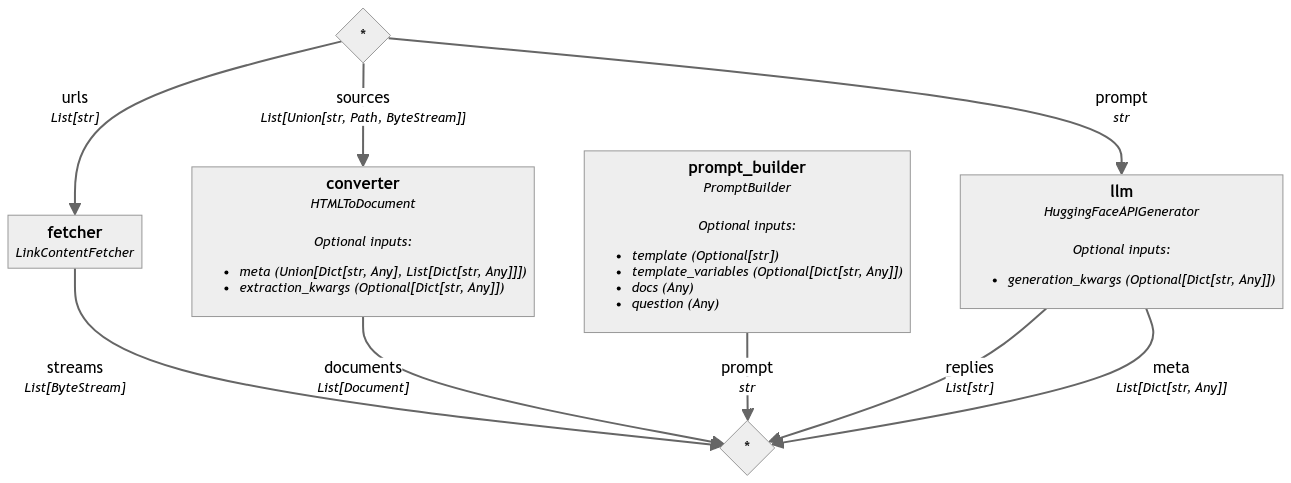

In [ ]:
pipeline.show()

In [ ]:
pipeline.connect("fetcher.streams", "converter.sources")
pipeline.connect("converter", "prompt_builder.docs")
pipeline.connect("prompt_builder", "llm")

🚅 Components
  - fetcher: LinkContentFetcher
  - converter: HTMLToDocument
  - prompt_builder: PromptBuilder
  - llm: HuggingFaceAPIGenerator
🛤️ Connections
  - fetcher.streams -> converter.sources (List[ByteStream])
  - converter.documents -> prompt_builder.docs (List[Document])
  - prompt_builder.prompt -> llm.prompt (str)

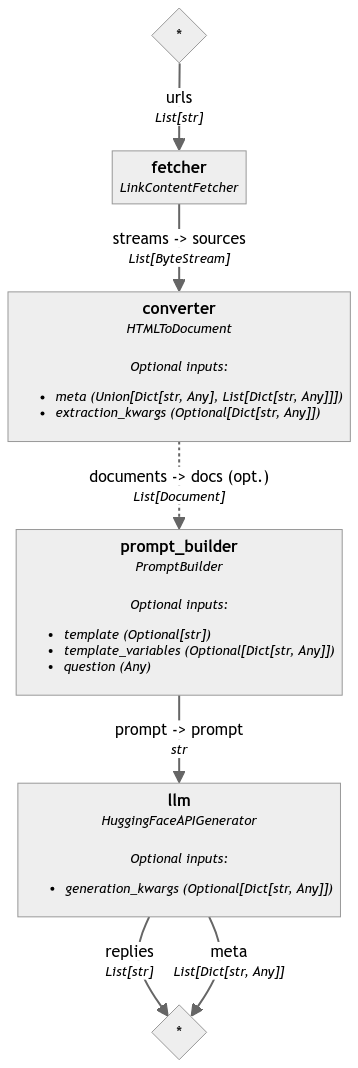

In [ ]:
pipeline.show()

In [ ]:
pipeline.run(data={"fetcher":{"urls":["https://haystack.deepset.ai/overview/quick-start"]},
                   "prompt_builder":{"question":"Which components are needed for a RAG application?"}
                   })

{'llm': {'replies': ['\n\nAnswer: To build a Retrieval Augmented Generation (RAG) application using Haystack, you need the following components:\n\n1. Retriever: This component is responsible for retrieving relevant documents from a document store based on the query. In the examples provided, we use `InMemoryEmbeddingRetriever`.\n\n2. Text Embedder: This component is responsible for converting the text into embeddings (vector representations) that can be used for similarity calculations. In the examples provided, we use `OpenAIDocumentEmbedder` and `OpenAITextEmbedder`.\n\n3. Prompt Builder: This component is responsible for constructing the prompt for the LLM. It takes the retrieved documents and the query, and generates a prompt that the LLM can use to answer the question. In the examples provided, we use `PromptBuilder`.\n\n4. Generator: This component is responsible for generating the answer to the question based on the prompt. In the examples provided, we use `OpenAIGenerator`.\n\

In [ ]:
pipeline.run(data={"fetcher":{"urls":["https://haystack.deepset.ai/overview/quick-start"]},
                   "prompt_builder":{"question":"Which components are needed for a RAG application?"}
                   }, include_outputs_from={"prompt_builder"})

{'llm': {'replies': ['\n\nAnswer: To build a Retrieval Augmented Generation (RAG) application using Haystack, you need the following components:\n\n1. Retriever: This component is responsible for retrieving relevant documents from a document store based on the query. In the examples provided, we use `InMemoryEmbeddingRetriever`.\n\n2. Text Embedder: This component is responsible for converting the text into embeddings (vector representations) that can be used for similarity calculations. In the examples provided, we use `OpenAIDocumentEmbedder` and `OpenAITextEmbedder`.\n\n3. Prompt Builder: This component is responsible for constructing the prompt for the LLM. It takes the retrieved documents and the query, and generates a prompt that the LLM can use to answer the question. In the examples provided, we use `PromptBuilder`.\n\n4. Generator: This component is responsible for generating the answer to the question based on the prompt. In the examples provided, we use `OpenAIGenerator`.\n\

## Custom Components

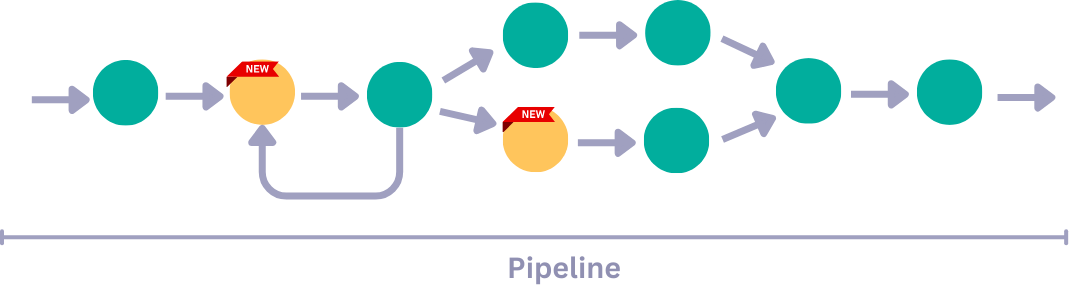

In [ ]:
from haystack import component

@component
class MyCustomComponent:

  @component.output_types(text=str)
  def run(self, name:str):
    text = f'Hello, my name is {name}'

    return {"text": text}

In [ ]:
my_component = MyCustomComponent()
my_component.run("Bilge")

{'text': 'Hello, my name is Bilge'}